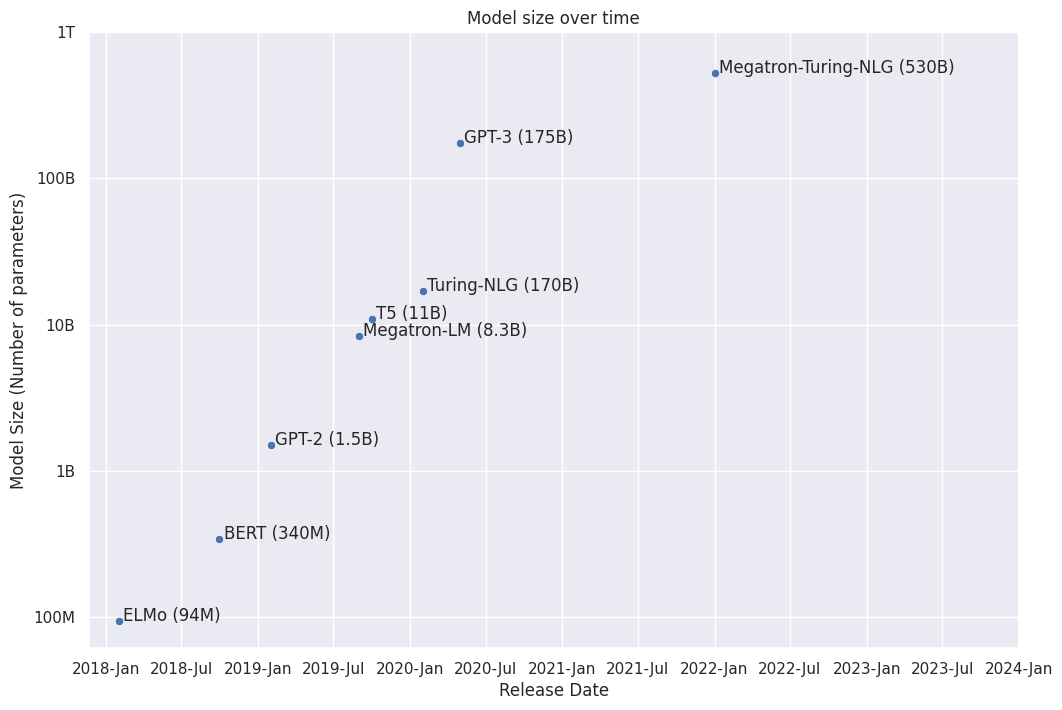

In [2]:
import os
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.dates import DateFormatter
import datetime
import numpy as np

data = pd.read_csv(os.path.abspath('') + '/model-size-over-time.csv', parse_dates=True)
data['date'] = pd.to_datetime(data['date'])

fig = plt.figure()

sns.set(rc={'figure.figsize':(12, 8)})
ax = sns.scatterplot(data, x='date', y='parameters')

ax.set(yscale='log')
ax.set(title='Model size over time', xlabel='Release Date', ylabel='Model Size (Number of parameters)')
x_dates = pd.date_range(start='2018-01-01', end='2024-01-01', freq='6MS')
ax.xaxis.set_ticks(x_dates)
ax.xaxis.set_major_formatter(DateFormatter('%Y-%b'))

ax.yaxis.set_ticks([1e8, 1e9, 1e10, 1e11, 1e12])
ax.yaxis.set_ticklabels(["100M", "1B", "10B", "100B", "1T"])

for i, point in data.iterrows():
    ax.text(point['date'] + datetime.timedelta(days=10), point['parameters'], point['model'])

plt.show()

fig.savefig('../../figures/model-size-over-time.pdf')